In [80]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# Import Dataset
url = "https://raw.githubusercontent.com/sanjida-akhtar/maternal-health-analysis/main/data/maternal_health.csv"
df = pd.read_csv(url)
df.head()

,Division,District,Year,Month,Total,ANC1(%),ANC2(%),ANC3(%),ANC4(%),ANC1,...,Ceasarean,Total Death,Maternal Death(%),Maternal Death,Maternal Death Review,Total PNC,PNC1(%),PNC2(%),PNC1,PNC2
0,Sylhet,Sunamganj,2024,January,2442,45.126945,21.089271,14.782965,19.000819,1102,...,80,0,0.0,0,0,1549,61.781795,38.218205,957,592
1,Sylhet,Sunamganj,2024,February,1250,0.000000,40.800000,28.480000,30.720000,0,...,65,0,0.0,0,0,1178,64.685908,35.314092,762,416
2,Sylhet,Sunamganj,2024,March,2320,48.405172,23.836207,14.784483,12.974138,1123,...,64,0,0.0,0,0,1169,55.603080,44.396920,650,519
3,Sylhet,Sunamganj,2024,April,2148,49.301676,22.532588,13.594041,14.571695,1059,...,64,2,50.0,1,1,1150,63.391304,36.608696,729,421
4,Sylhet,Sunamganj,2024,May,2191,45.093565,23.961661,14.194432,16.750342,988,...,55,4,50.0,2,2,1052,65.114068,34.885932,685,367


In [ ]:
# Copy the dataset
data = df.copy()
data.head()

,Division,District,Year,Month,Total,ANC1(%),ANC2(%),ANC3(%),ANC4(%),ANC1,...,Ceasarean,Total Death,Maternal Death(%),Maternal Death,Maternal Death Review,Total PNC,PNC1(%),PNC2(%),PNC1,PNC2
0,Sylhet,Sunamganj,2024,January,2442,45.126945,21.089271,14.782965,19.000819,1102,...,80,0,0.0,0,0,1549,61.781795,38.218205,957,592
1,Sylhet,Sunamganj,2024,February,1250,0.000000,40.800000,28.480000,30.720000,0,...,65,0,0.0,0,0,1178,64.685908,35.314092,762,416
2,Sylhet,Sunamganj,2024,March,2320,48.405172,23.836207,14.784483,12.974138,1123,...,64,0,0.0,0,0,1169,55.603080,44.396920,650,519
3,Sylhet,Sunamganj,2024,April,2148,49.301676,22.532588,13.594041,14.571695,1059,...,64,2,50.0,1,1,1150,63.391304,36.608696,729,421
4,Sylhet,Sunamganj,2024,May,2191,45.093565,23.961661,14.194432,16.750342,988,...,55,4,50.0,2,2,1052,65.114068,34.885932,685,367


In [ ]:
# Rename columns
data.rename(columns = {"District " : "District"}, inplace = True)

In [ ]:
# Drop unncessary columns
data = data.drop(columns = ["Division","Total", "ANC1(%)", "ANC2(%)", "ANC3(%)", "ANC4(%)", "NVD(%)", "Ceasarean(%)","Total Death", "Maternal Death(%)",
                           "Maternal Death Review", "Total PNC", "PNC1(%)", "PNC2(%)"], axis = 1)

In [ ]:
# Display the shape of dataset
data.shape

(768, 13)

In [ ]:
# Display basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   District        768 non-null    object
 1   Year            768 non-null    int64 
 2   Month           768 non-null    object
 3   ANC1            768 non-null    int64 
 4   ANC2            768 non-null    int64 
 5   ANC3            768 non-null    int64 
 6   ANC4            768 non-null    int64 
 7   Delivery        768 non-null    int64 
 8   NVD             768 non-null    int64 
 9   Ceasarean       768 non-null    int64 
 10  Maternal Death  768 non-null    int64 
 11  PNC1            768 non-null    int64 
 12  PNC2            768 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 78.1+ KB


In [ ]:
# Display statistical summary of the dataset
data.describe(include="all")

,District,Year,Month,ANC1,ANC2,ANC3,ANC4,Delivery,NVD,Ceasarean,Maternal Death,PNC1,PNC2
count,768,768.000000,768,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
unique,8,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sunamganj,NaN,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,96,NaN,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2020.500000,NaN,2844.384115,1492.548177,1267.003906,1216.993490,1738.763021,901.619792,827.170573,1.072917,1539.735677,915.104167
std,NaN,2.292781,NaN,3780.695282,3166.543900,2989.305372,3053.265953,3012.504018,1241.750600,1829.321894,3.077427,2780.047264,2088.146917
min,NaN,2017.000000,NaN,0.000000,0.000000,0.000000,0.000000,188.000000,132.000000,5.000000,0.000000,118.000000,26.000000
25%,NaN,2018.750000,NaN,989.500000,299.500000,180.750000,140.500000,612.500000,416.500000,97.000000,0.000000,548.750000,208.750000
50%,NaN,2020.500000,NaN,1351.500000,554.500000,374.000000,308.000000,849.000000,549.000000,244.000000,0.000000,798.000000,322.500000
75%,NaN,2022.250000,NaN,2558.750000,812.500000,597.750000,532.000000,1099.250000,731.500000,530.500000,1.000000,1039.000000,586.250000


In [ ]:
# Check for data types of all variables
data.dtypes

,0
District,object
Year,int64
Month,object
ANC1,int64
ANC2,int64
ANC3,int64
ANC4,int64
Delivery,int64
NVD,int64
Ceasarean,int64


In [ ]:
# Label Encoding on District variable
le = LabelEncoder()
data["District"] = le.fit_transform(data["District"])

In [ ]:
# Display number of values
data["District"].value_counts()

,count
District,
7,96
2,96
3,96
5,96
6,96
4,96
1,96
0,96


In [ ]:
# Label encoding on Month variable
la = LabelEncoder()
data["Month"] = la.fit_transform(data["Month"])

In [ ]:
# Display number of values in Month variable
data["Month"].value_counts()

,count
Month,
4,64
3,64
7,64
0,64
8,64
6,64
5,64
1,64
11,64


In [ ]:
# Create a list to hold values
arr = data["Maternal Death"].values
li = list(arr)
def death_discretization(data):
  """
  Discretizes values of a list, 0 represents No Death,
  1 represents Low number of Death, 2 represents Medium number of Death and
  3 represents High number of Death
  data : Parameter represents a list.Return value.
  """
  for x in range(len(data)):
    if data[x] == 0:
       data[x] = 0        # No death
    elif data[x] < 25:
       data[x] = 1        # Low Death
    elif data[x] < 50:
       data[x] = 2        # Medium Death
    else:
       data[x] = 3        # High Death
  return data

# Create Maternal Death Status column to hold discretized values
data["Maternal Death Category"] = death_discretization(arr)

In [ ]:
# Set data type to integer
data["Maternal Death Category"] = data["Maternal Death Category"].astype(int)

In [ ]:
# Display the number of each values
data["Maternal Death Category"].value_counts()

,count
Maternal Death Category,
0,480
1,286
3,1
2,1


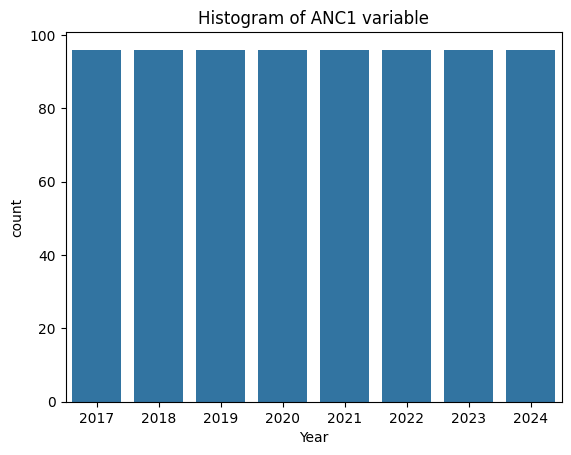

In [ ]:
# Plot a countplot
sns.countplot(x = data["Year"], data = data)
plt.xlabel("Year")
plt.title("Histogram of ANC1 variable")
plt.show()

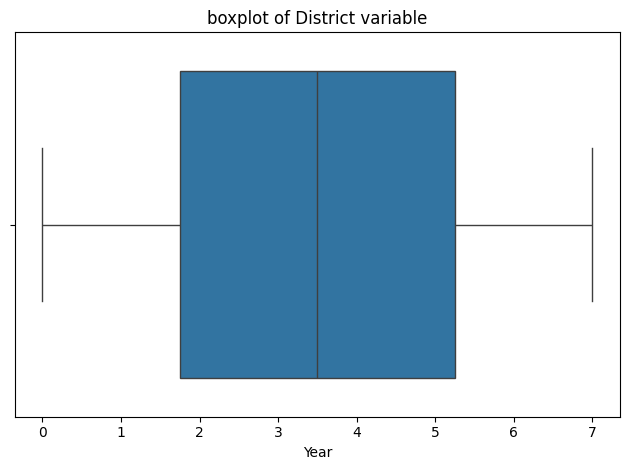

In [ ]:
# Plot a boxplot
sns.boxplot(x = data["District"], data = data)
plt.xlabel("Year")
plt.title("boxplot of District variable")
plt.tight_layout()
plt.show()

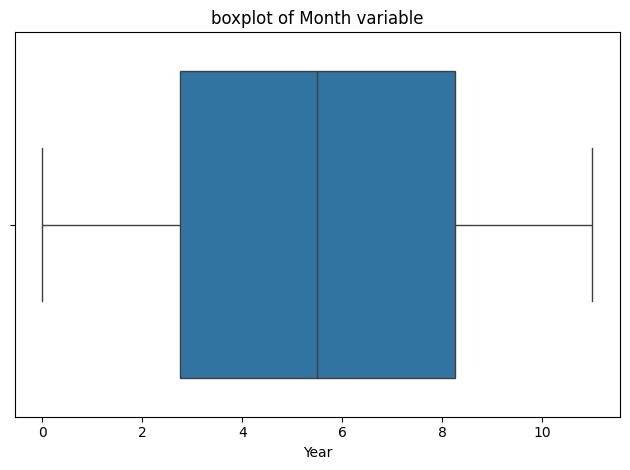

In [ ]:
# Plot a boxplot
sns.boxplot(x = data["Month"], data = data)
plt.xlabel("Year")
plt.title("boxplot of Month variable")
plt.tight_layout()
plt.show()

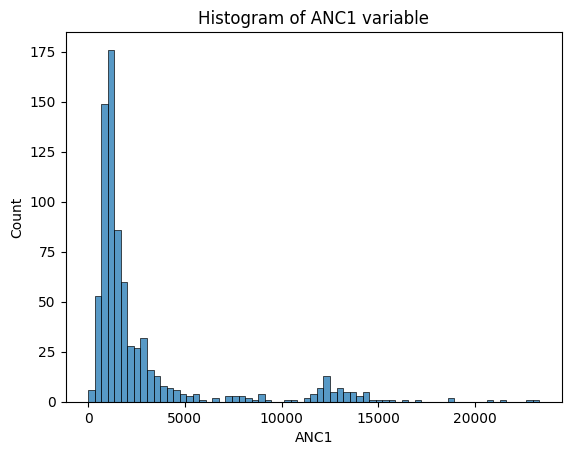

In [ ]:
# Display the histogram of ANC1
sns.histplot(x = data["ANC1"], data = data)
plt.xlabel("ANC1")
plt.title("Histogram of ANC1 variable")
plt.show()

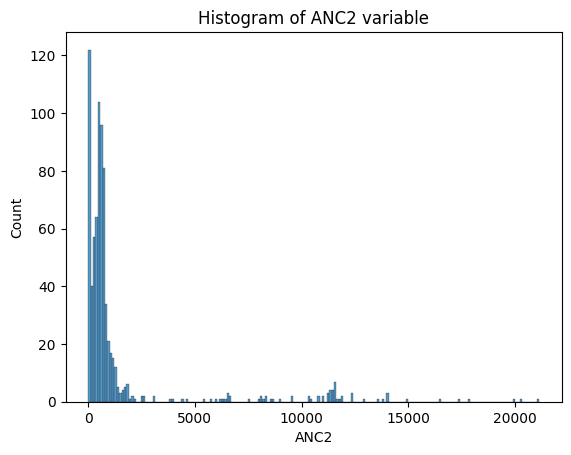

In [ ]:
# Display the histogram of ANC2
sns.histplot(x = data["ANC2"], data = data)
plt.xlabel("ANC2")
plt.title("Histogram of ANC2 variable")
plt.show()

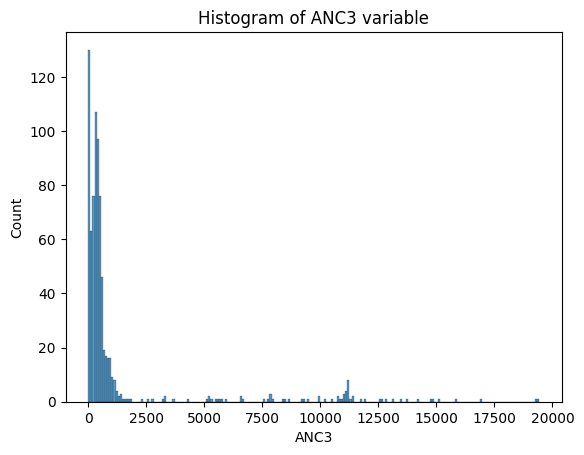

In [ ]:
# Display the histogram of ANC3
sns.histplot(x = data["ANC3"], data = data)
plt.xlabel("ANC3")
plt.title("Histogram of ANC3 variable")
plt.show()

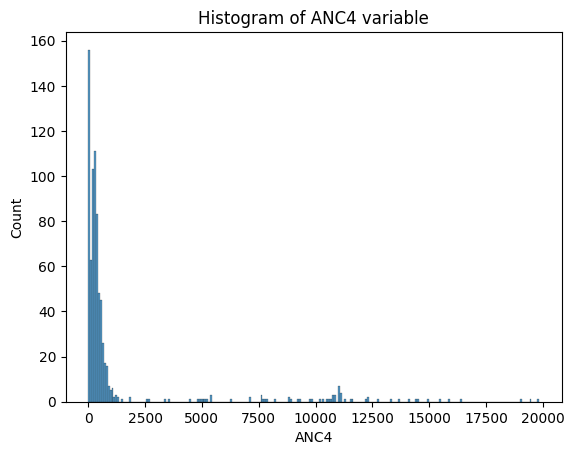

In [ ]:
# Display the histogram of ANC4
sns.histplot(x = data["ANC4"], data = data)
plt.xlabel("ANC4")
plt.title("Histogram of ANC4 variable")
plt.show()

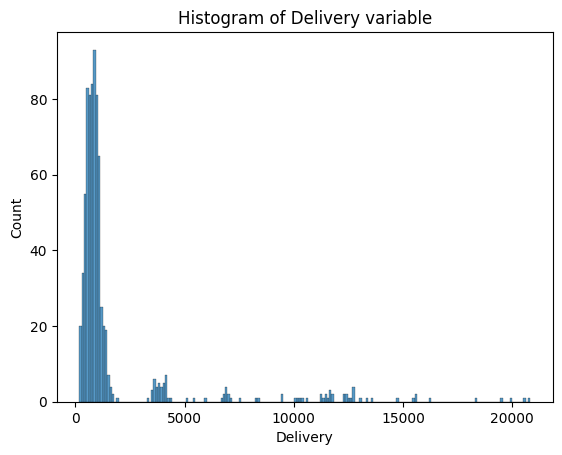

In [ ]:
# Display the histogram of Delivery
sns.histplot(x = data["Delivery"], data = data)
plt.xlabel("Delivery")
plt.title("Histogram of Delivery variable")
plt.show()

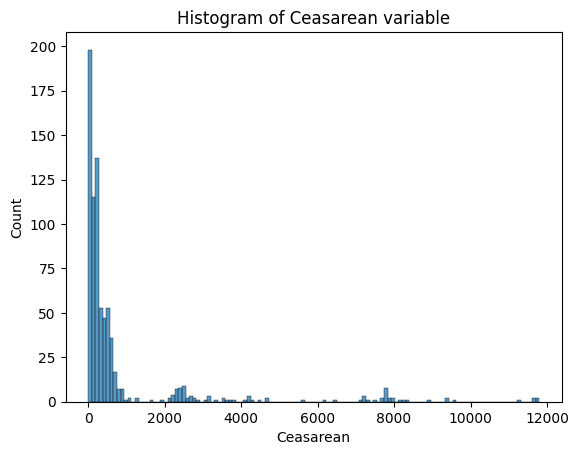

In [ ]:
# Display the histogram of Ceasarean
sns.histplot(x = data["Ceasarean"], data = data)
plt.xlabel("Ceasarean")
plt.title("Histogram of Ceasarean variable")
plt.show()

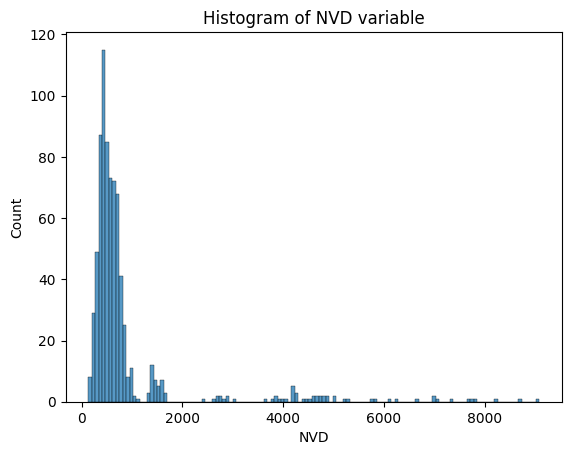

In [ ]:
# Display the histogram of NVD
sns.histplot(x = data["NVD"], data = data)
plt.xlabel("NVD")
plt.title("Histogram of NVD variable")
plt.show()

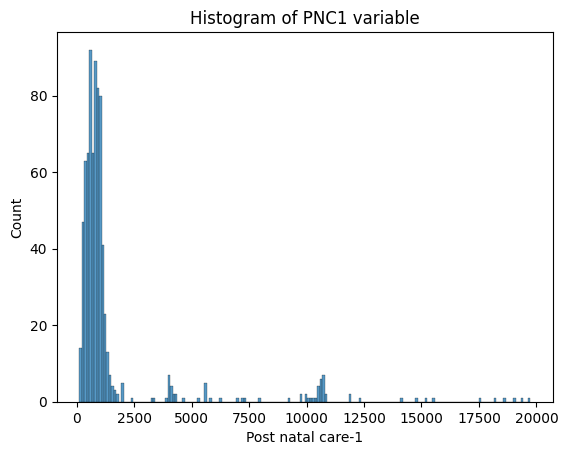

In [ ]:
# Display the histogram of PNC1
sns.histplot(x = data["PNC1"], data = data)
plt.xlabel("Post natal care-1")
plt.title("Histogram of PNC1 variable")
plt.show()

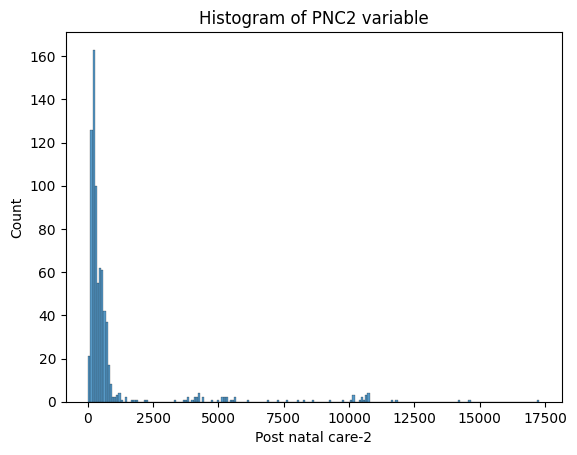

In [ ]:
# Display the histogram of PNC2
sns.histplot(x = data["PNC2"], data = data)
plt.xlabel("Post natal care-2")
plt.title("Histogram of PNC2 variable")
plt.show()

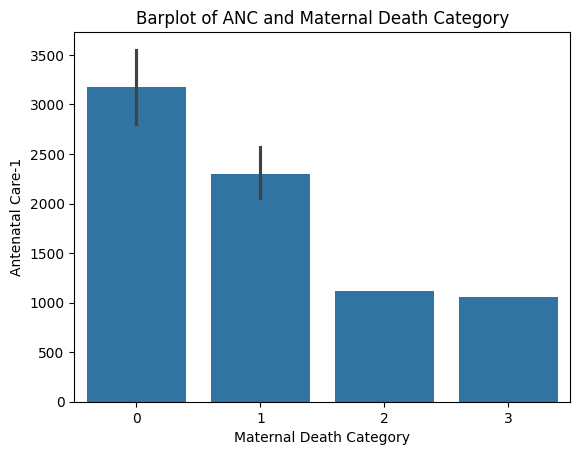

In [ ]:
# Bivariate EDA

# Display barplot of ANC1
sns.barplot(  x= data["Maternal Death Category"],y = data["ANC1"], data = data)
plt.ylabel("Antenatal Care-1")
plt.xlabel("Maternal Death Category")
plt.title("Barplot of ANC and Maternal Death Category")
plt.show()

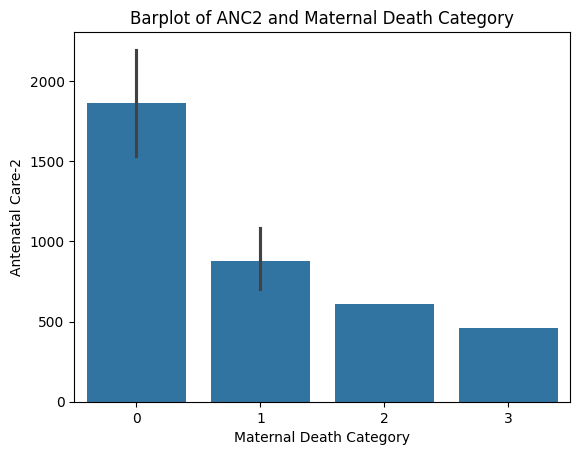

In [ ]:
# Display barplot
sns.barplot(  x= data["Maternal Death Category"],y = data["ANC2"], data = data)
plt.ylabel("Antenatal Care-2")
plt.xlabel("Maternal Death Category")
plt.title("Barplot of ANC2 and Maternal Death Category")
plt.show()

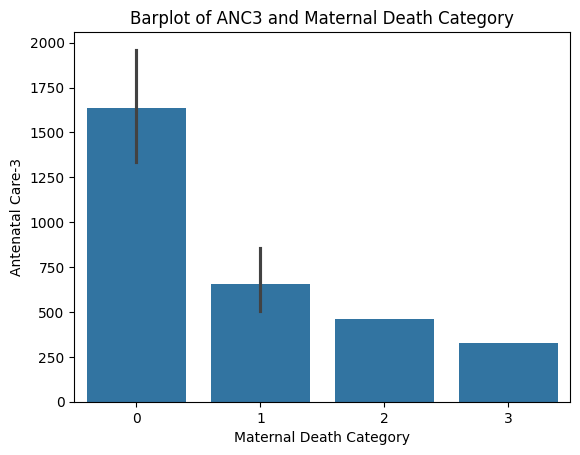

In [ ]:
# Display barplot
sns.barplot(  x= data["Maternal Death Category"],y = data["ANC3"], data = data)
plt.ylabel("Antenatal Care-3")
plt.xlabel("Maternal Death Category")
plt.title("Barplot of ANC3 and Maternal Death Category")
plt.show()

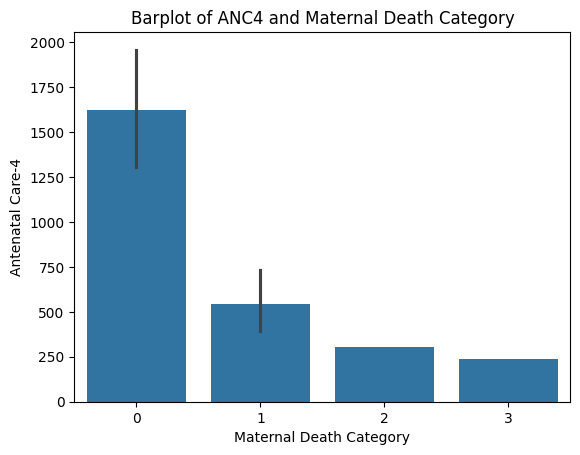

In [ ]:
# Display barplot
sns.barplot(  x= data["Maternal Death Category"],y = data["ANC4"], data = data)
plt.ylabel("Antenatal Care-4")
plt.xlabel("Maternal Death Category")
plt.title("Barplot of ANC4 and Maternal Death Category")
plt.show()

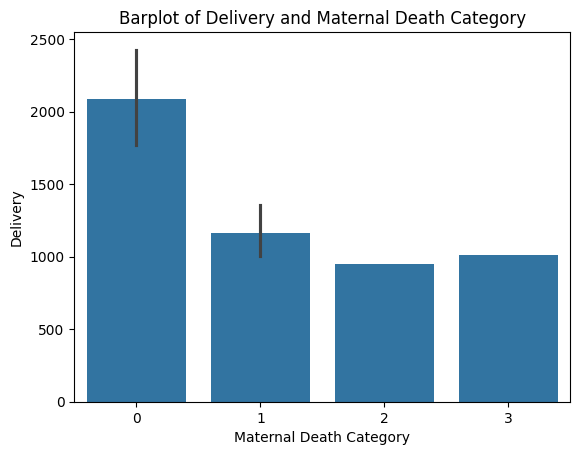

In [ ]:
# Display barplot
sns.barplot(  x= data["Maternal Death Category"],y = data["Delivery"], data = data)
plt.ylabel("Delivery")
plt.xlabel("Maternal Death Category")
plt.title("Barplot of Delivery and Maternal Death Category")
plt.show()

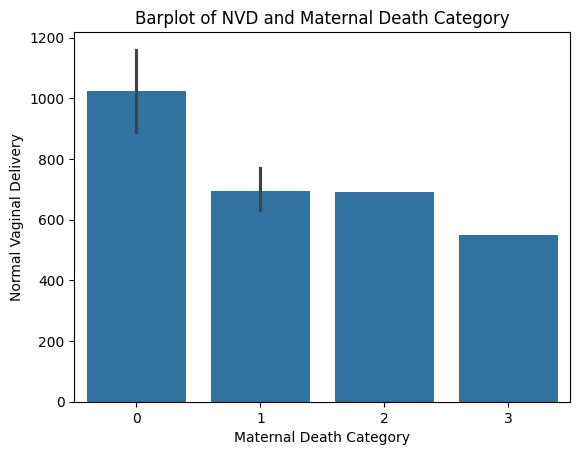

In [ ]:
# Display barplot
sns.barplot( x= data["Maternal Death Category"],y = data["NVD"], data = data)
plt.ylabel("Normal Vaginal Delivery")
plt.xlabel("Maternal Death Category")
plt.title("Barplot of NVD and Maternal Death Category")
plt.show()

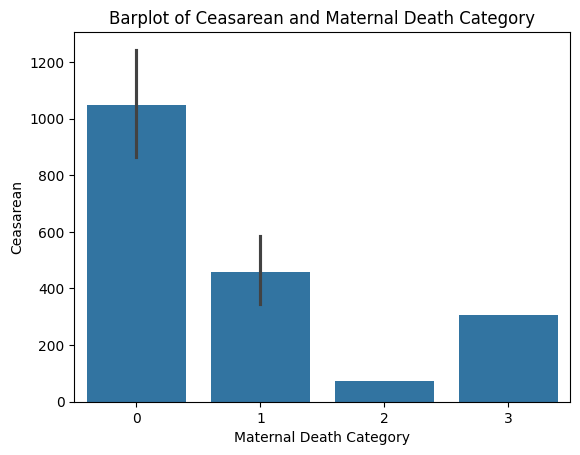

In [ ]:
# Display barplot
sns.barplot( x= data["Maternal Death Category"],y = data["Ceasarean"], data = data)
plt.ylabel("Ceasarean")
plt.xlabel("Maternal Death Category")
plt.title("Barplot of Ceasarean and Maternal Death Category")
plt.show()

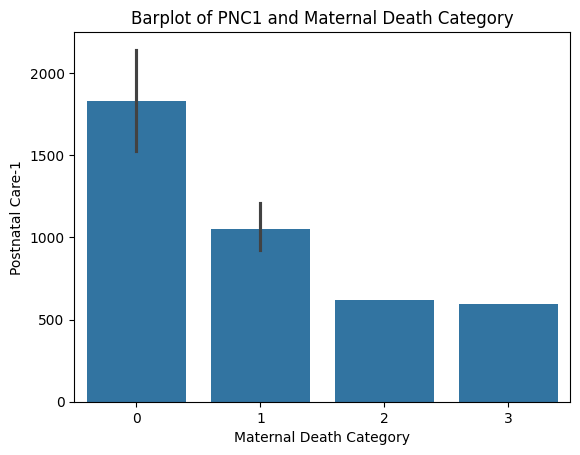

In [ ]:
# Display barplot
sns.barplot(  x= data["Maternal Death Category"],y = data["PNC1"], data = data)
plt.ylabel("Postnatal Care-1")
plt.xlabel("Maternal Death Category")
plt.title("Barplot of PNC1 and Maternal Death Category")
plt.show()

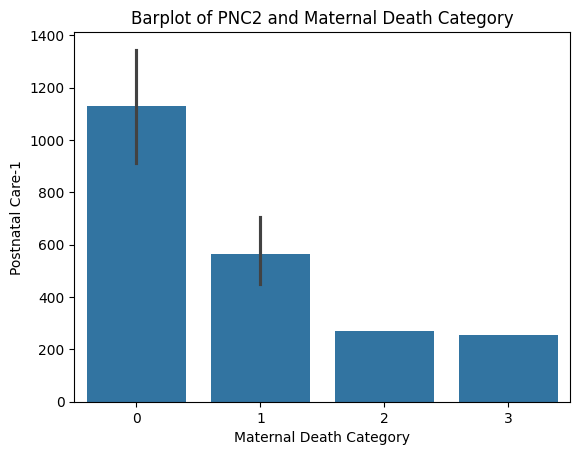

In [ ]:
# Display barplot
sns.barplot( x= data["Maternal Death Category"],y = data["PNC2"], data = data)
plt.ylabel("Postnatal Care-1")
plt.xlabel("Maternal Death Category")
plt.title("Barplot of PNC2 and Maternal Death Category")
plt.show()

In [ ]:
# Display crosstab
dis = pd.crosstab(data["Maternal Death Category"], data["District"])
dis

District,0,1,2,3,4,5,6,7
Maternal Death Category,,,,,,,,
0,43,78,83,84,73,6,56,57
1,53,18,13,12,21,90,40,39
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0


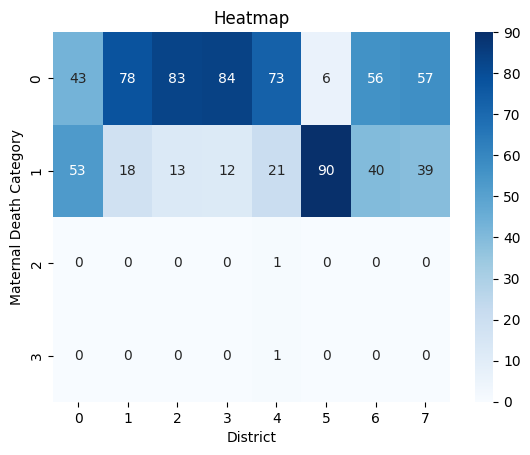

In [ ]:
# Display heatmap
sns.heatmap(dis, annot = True, fmt = "d", cmap = "Blues")
plt.title("Heatmap")
plt.show()

In [ ]:
# Display crosstab
month = pd.crosstab(data["Maternal Death Category"], data["Month"])
month

Month,0,1,2,3,4,5,6,7,8,9,10,11
Maternal Death Category,,,,,,,,,,,,
0,42,36,41,39,34,41,39,45,43,37,42,41
1,22,28,23,25,30,22,24,19,21,27,22,23
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0


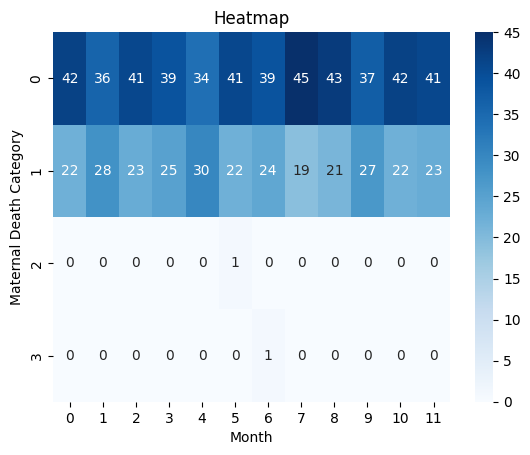

In [ ]:
# Display heatmap
sns.heatmap(month, annot = True, fmt = "d", cmap = "Blues")
plt.title("Heatmap")
plt.show()

In [ ]:

X = data.drop(["Maternal Death", "Maternal Death Category"], axis = 1)
y = data["Maternal Death Category"]

In [ ]:
# Find correlation among variables
cor = data.corr()

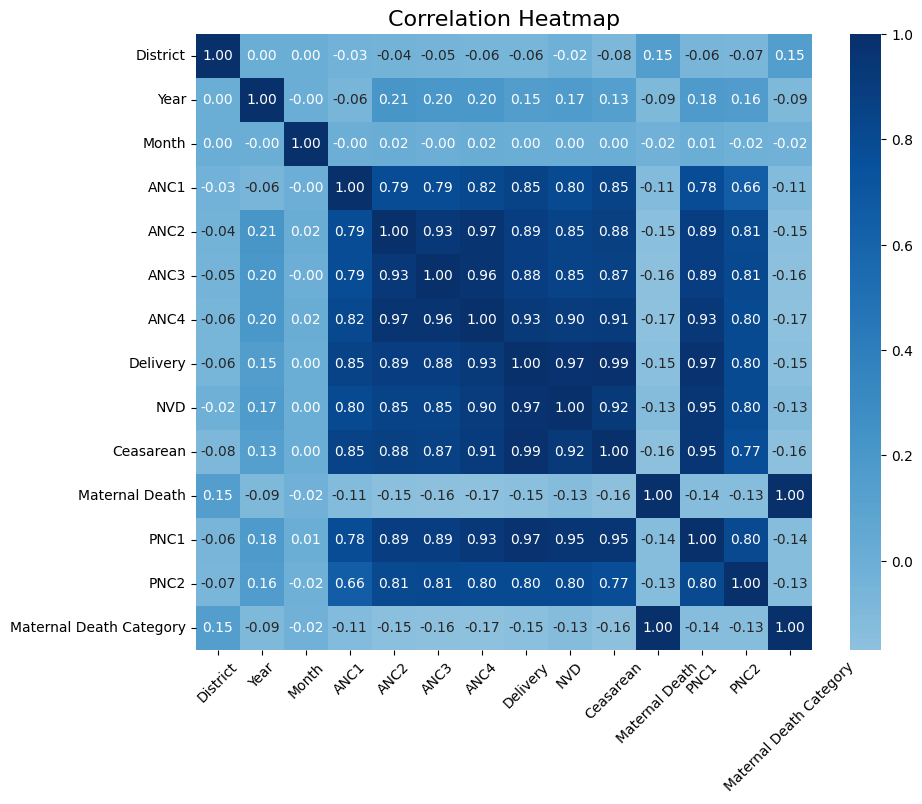

In [ ]:
# Display a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(cor, cmap = "Blues", annot = True, square = True, center = 0, fmt = ".2f")
plt.title("Correlation Heatmap", fontsize = 16)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

# Standardise dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create RandomForestClassifier object
rfc = RandomForestClassifier()
# Train the model
rfc.fit(X_train_scaled, y_train)
# Predict validation data
rfc_yhat_val = rfc.predict(X_val_scaled)

# Calculate metrics for validation set
rfc_accuracy = accuracy_score(y_val, rfc_yhat_val)

rfc_pre = precision_score(y_val, rfc_yhat_val, average = "macro")
rfc_rec = recall_score(y_val, rfc_yhat_val, average = "macro")
rfc_f1 = f1_score(y_val, rfc_yhat_val, average = "macro")

print("Evalutaion metrics in validation set: ")
print(f"Accuracy in RandomForest Classifier: {rfc_accuracy: .2f}")
print(f"Precision Score in RandomForest Classifier: {rfc_pre: .2f}",)
print(f"Recall Score in K RandomForest Classifier: {rfc_rec: .2f}",)
print(f"F-1 Score in K RandomForest Classifier: {rfc_f1: .2f}",)

Evalutaion metrics in validation set: 
Accuracy in RandomForest Classifier:  0.73
Precision Score in RandomForest Classifier:  0.72
Recall Score in K RandomForest Classifier:  0.72
F-1 Score in K RandomForest Classifier:  0.72


In [ ]:
# Predict on test set
rfc_yhat_test = rfc.predict(X_test_scaled)

# Calculate metrics on test set
rfc_accuracy = accuracy_score(y_test, rfc_yhat_test)
rfc_pre_test = precision_score(y_test, rfc_yhat_test, average = "macro")
rfc_rec_test = recall_score(y_test, rfc_yhat_test, average = "macro")
rfc_f1_test = f1_score(y_test, rfc_yhat_test, average = "macro")

# Display the metrics
print("Evaluation metrics in test set:")
print(f"Accuracy in RandomForest Classifier: {rfc_accuracy: .2f}")
print(f"Precision Score in RandomForest Classifier: {rfc_pre: .2f}",)
print(f"Recall Score in K RandomForest Classifier: {rfc_rec: .2f}",)
print(f"F-1 Score in K RandomForest Classifier: {rfc_f1: .2f}",)

Evaluation metrics in test set:
Accuracy in RandomForest Classifier:  0.71
Precision Score in RandomForest Classifier:  0.72
Recall Score in K RandomForest Classifier:  0.72
F-1 Score in K RandomForest Classifier:  0.72


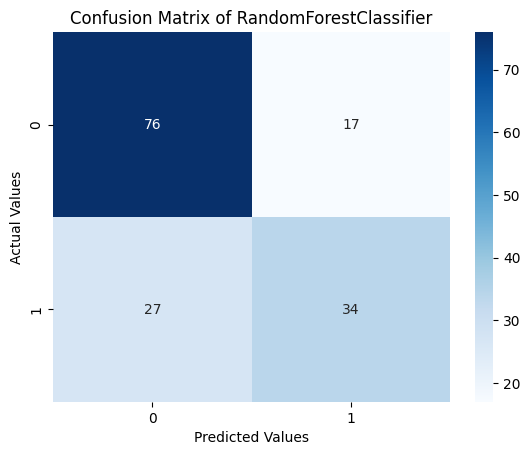

In [ ]:
# Build confusion matrix and display heatmap
cma = confusion_matrix(y_test, rfc_yhat_test)
sns.heatmap(cma, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix of RandomForestClassifier")
plt.show()

In [ ]:
# Create KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
# Train the model
knn.fit(X_train, y_train)

# Predict on validation set
knn_yhat_val = knn.predict(X_val)
# Calculate metrics on validation set
accuracy_val = accuracy_score(y_val, knn_yhat_val)
pre_val = precision_score(y_val, knn_yhat_val, average = "macro")
rec_val = recall_score(y_val, knn_yhat_val, average = "macro")
f1_val = f1_score(y_val, knn_yhat_val, average = "macro")

# Display metrics on validation set
print(f"Accuracy in K Nearest Neighbors: {accuracy_val: .2f}")
print(f"Precision Score in K nearest neighbor: {pre_val: .2f}",)
print(f"Recall Score in K nearest neighbor: {rec_val: .2f}",)
print(f"F-1 Score in K nearest neighbor: {f1_val: .2f}",)

Accuracy in K Nearest Neighbors:  0.69
Precision Score in K nearest neighbor:  0.69
Recall Score in K nearest neighbor:  0.68
F-1 Score in K nearest neighbor:  0.68


In [ ]:
# Predict on test set
knn_yhat_test = knn.predict(X_test)

# Calculate metrics on test set
accuracy_test = accuracy_score(y_test, knn_yhat_test)
pre_test = precision_score(y_test, knn_yhat_test, average = "macro")
rec_test = recall_score(y_test, knn_yhat_test, average = "macro")
f1_test = f1_score(y_test, knn_yhat_test, average = "macro")

# Display the metrics on test set
print(f"Accuracy in K Nearest Neighbors: {accuracy_test: .2f}")
print(f"Precision Score in K nearest neighbor: {pre_test: .2f}",)
print(f"Recall Score in K nearest neighbor: {rec_test: .2f}",)
print(f"F-1 Score in K nearest neighbor: {f1_test: .2f}",)

Accuracy in K Nearest Neighbors:  0.71
Precision Score in K nearest neighbor:  0.70
Recall Score in K nearest neighbor:  0.67
F-1 Score in K nearest neighbor:  0.67


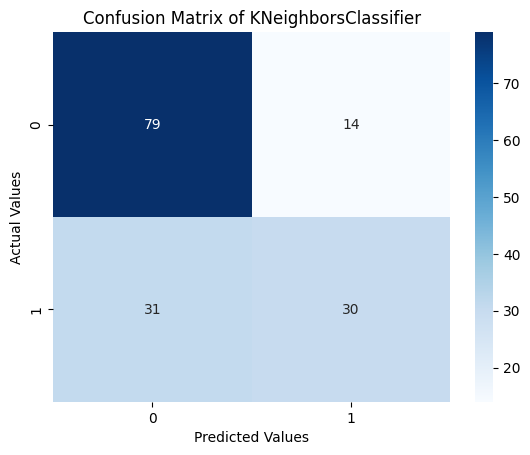

In [ ]:
# Create confusion matrix and display a heatmap
cm = confusion_matrix(y_test, knn_yhat_test)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix of KNeighborsClassifier")
plt.show()

In [ ]:
# Create DMatrix
xgb_train = xgb.DMatrix(X_train, y_train)
xgb_test = xgb.DMatrix(X_test, y_test)

In [ ]:
# Create and train xgb model
params = {'objective': 'multi:softmax',
          "max_depth" : 3,
          "learning_rate" : 0.01,
          "num_class" : 4}
n = 50
model = xgb.train(params = params, dtrain = xgb_train, num_boost_round = n)
xgb_yhat = model.predict(xgb_test)



In [ ]:
# Get label of test set
xgb_test = xgb_test.get_label()
# Calculate metrics on test set
xgb_accuracy = accuracy_score(xgb_test, xgb_yhat)
xgb_pre = precision_score(xgb_test, xgb_yhat)
xgb_rec = recall_score(xgb_test, xgb_yhat)
xgb_f1 = f1_score(xgb_test, xgb_yhat)

# Display the metrics on test set
print(f"Accuracy in XGBoost: {xgb_accuracy: .2f}")
print(f"Precision in XGBoost: {xgb_pre: .2f}")
print(f"Recall in XGBoost: {xgb_rec: .2f}")
print(f"F-1 score in XGBoost: {xgb_f1: .2f}")
print("Confusion Matrix: ")
print(confusion_matrix(xgb_test, xgb_yhat))

Accuracy in XGBoost:  0.73
Precision in XGBoost:  0.77
Recall in XGBoost:  0.44
F-1 score in XGBoost:  0.56
Confusion Matrix: 
[[85  8]
 [34 27]]


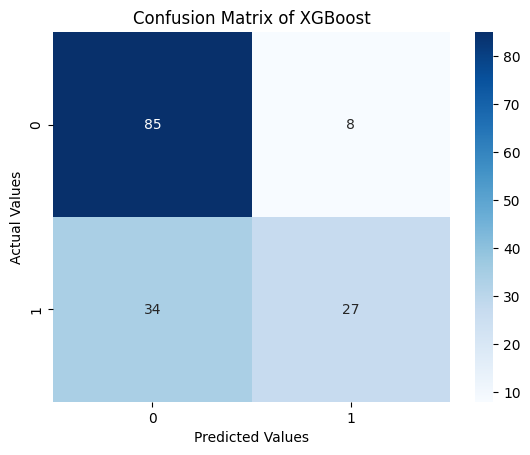

In [ ]:
# Create a confusion matrix and display a heatmap
cmat = confusion_matrix(xgb_test, xgb_yhat)
sns.heatmap(cmat, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix of XGBoost")
plt.show()